# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, SeparableConv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


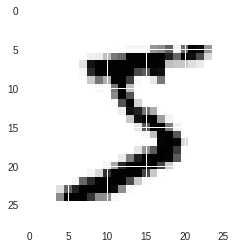

In [25]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [203]:
from keras.layers import Activation
model = Sequential()

 
model.add(SeparableConv2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(32, 3, 3, activation='relu'))
model.add(SeparableConv2D(64, 3, 3, activation='relu'))
model.add(SeparableConv2D(96, 3, 3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(SeparableConv2D(128, 3, 3, activation='relu'))
model.add(SeparableConv2D(192, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))
#model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we

In [204]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_176 (Separa (None, 26, 26, 16)        41        
_________________________________________________________________
separable_conv2d_177 (Separa (None, 24, 24, 32)        688       
_________________________________________________________________
separable_conv2d_178 (Separa (None, 22, 22, 64)        2400      
_________________________________________________________________
separable_conv2d_179 (Separa (None, 20, 20, 96)        6816      
_________________________________________________________________
average_pooling2d_37 (Averag (None, 10, 10, 96)        0         
_________________________________________________________________
separable_conv2d_180 (Separa (None, 8, 8, 128)         13280     
_________________________________________________________________
separable_conv2d_181 (Separa (None, 6, 6, 192)         25920     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [206]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 53s 879us/step - loss: 0.3063 - acc: 0.8996
Epoch 2/10
 6784/60000 [==>...........................] - ETA: 42s - loss: 0.1008 - acc: 0.9695

60000/60000 [==============================] - 48s 807us/step - loss: 0.0834 - acc: 0.9741
Epoch 3/10
13568/60000 [=====>........................] - ETA: 37s - loss: 0.0655 - acc: 0.9786

60000/60000 [==============================] - 48s 805us/step - loss: 0.0625 - acc: 0.9808
Epoch 4/10
18240/60000 [========>.....................] - ETA: 33s - loss: 0.0514 - acc: 0.9843

60000/60000 [==============================] - 48s 805us/step - loss: 0.0501 - acc: 0.9846
Epoch 5/10
19264/60000 [========>.....................] - ETA: 32s - loss: 0.0422 - acc: 0.9863

60000/60000 [==============================] - 48s 803us/step - loss: 0.0421 - acc: 0.9866
Epoch 6/10
20064/60000 [=========>....................] - ETA: 31s - loss: 0.0325 - acc: 0.9896

60000/60000 [==============================] - 48s 799us/step - loss: 0.0352 - acc: 0.9889
Epoch 7/10
20000/60000 [=========>....................] - ETA: 32s - loss: 0.0308 - acc: 0.9901

60000/60000 [==============================] - 49s 810us/step - loss: 0.0313 - acc: 0.9895
Epoch 8/10
20416/60000 [=========>....................] - ETA: 31s - loss: 0.0240 - acc: 0.9920

60000/60000 [==============================] - 48s 803us/step - loss: 0.0264 - acc: 0.9911
Epoch 9/10
20352/60000 [=========>....................] - ETA: 31s - loss: 0.0252 - acc: 0.9913

60000/60000 [==============================] - 48s 801us/step - loss: 0.0237 - acc: 0.9924
Epoch 10/10
20768/60000 [=========>....................] - ETA: 31s - loss: 0.0200 - acc: 0.9934

60000/60000 [==============================] - 48s 798us/step - loss: 0.0214 - acc: 0.9932


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [208]:
print(score)

[0.028157016608602134, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [196]:
print(y_pred[:9])
print(y_test[:9])

[[8.33973793e-11 3.67362163e-09 2.03579339e-06 4.76152309e-06
  1.41320801e-11 1.14267961e-11 1.23266651e-15 9.99993205e-01
  6.33640518e-09 2.22350796e-08]
 [1.18211133e-07 5.88961413e-09 9.99999762e-01 1.78237650e-11
  1.53307800e-09 1.32097245e-14 1.00010496e-07 1.82395252e-10
  2.78482259e-09 1.63243627e-12]
 [1.88462752e-06 9.99950886e-01 3.31370643e-07 1.10791589e-07
  2.37121203e-05 6.94841091e-08 9.67828555e-07 1.93768901e-05
  2.46625700e-06 1.33615558e-07]
 [9.99977708e-01 1.28750621e-11 6.54398047e-09 1.13088383e-08
  1.90974476e-11 7.37368033e-09 1.12969237e-05 9.00952576e-12
  1.08974855e-05 6.24973424e-08]
 [2.60356181e-10 3.78340337e-09 1.80796229e-11 1.04171560e-09
  9.99920964e-01 1.46102297e-10 1.02675841e-07 3.05659120e-09
  1.97802930e-08 7.89324331e-05]
 [6.62321725e-07 9.99944568e-01 2.23903868e-07 4.57743266e-09
  2.46879845e-05 5.36224620e-10 7.05960517e-08 2.86435879e-05
  1.00567581e-06 9.71622853e-08]
 [2.34627923e-14 1.79726015e-07 7.53772045e-11 1.32920383e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

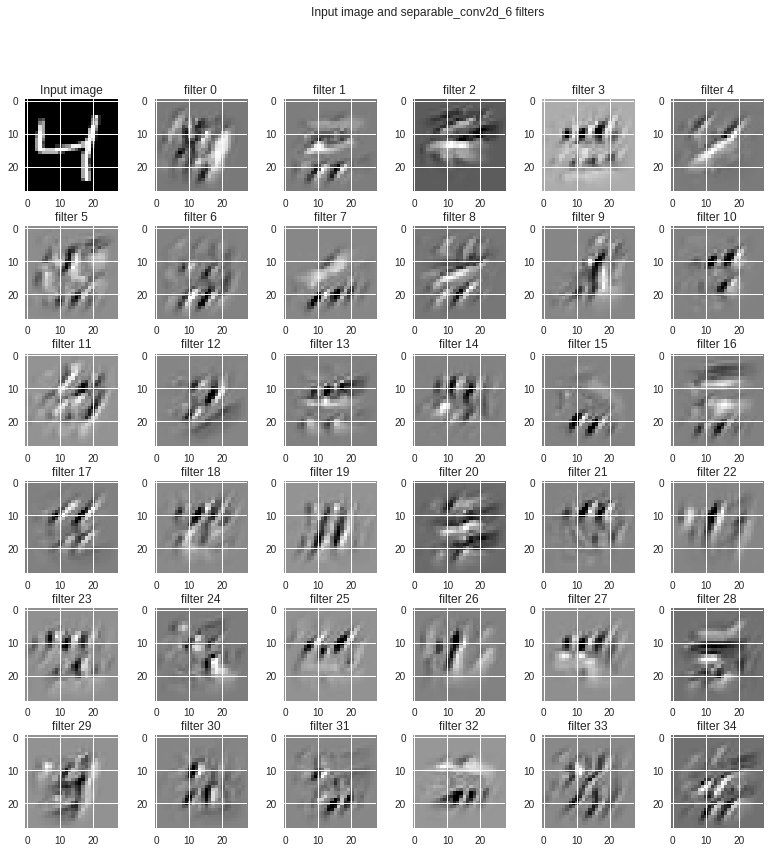

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'separable_conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()